In [1]:
import pandas as pd

# Waffle chart - Offer distribution (offer/reject/waiting) of US/UK/HK

## extract the data needed

In [2]:
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'case', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'id', 'uniqid', 'schoolname', 'professional',
       'countries', 'sid', 'pid', 'nid', 'offer_id', 'uid', 'degree',
       'degree_other', 'apply_results', 'apply_lang', 'year', 'timestamp',
       'updatetime', 'time_year', 'time_month', 'time_day', 'semester',
       'notice_time', 'vieworder', 'state', 'urls', 'toefl', 'gre', 'ielts',
       'ptea', 'sub', 'gmat', 'undergraduate_subject', 'undergraduate_sid',
       'undergraduate_gpa', 'graduate_subject', 'case.1'],
      dtype='object')

In [4]:
df['apply_results']

0        1
1        4
2        5
3        5
4        4
        ..
96071    3
96072    5
96073    5
96074    4
96075    1
Name: apply_results, Length: 96076, dtype: int64

In [5]:
df.apply_results.value_counts()

1    38993
3    32102
4    14588
2     8335
5     2057
0        1
Name: apply_results, dtype: int64

### recode the apply_results

In [6]:
df['apply_results'].replace(4,0,inplace=True)

In [7]:
df['apply_results'].replace([1,2,3],1,inplace=True)

In [8]:
df['apply_results'].replace(5,2,inplace=True)

In [9]:
#0-拒绝；1-offer；2-waiting list
df.apply_results.value_counts()

1    79430
0    14589
2     2057
Name: apply_results, dtype: int64

### after covid-19, the apply_results of different countries

In [10]:
df[
    (   df['time_year'] == 2020) & 
        ((df['time_month'] >= 9) & 
        (df['time_month'] <= 12)    )     |
    (   df['time_year'] == 2021) & 
        ((df['time_month'] >= 1) & 
        (df['time_month'] <= 8)    )     

].groupby(by='countries').apply_results.value_counts().tail(10)

countries  apply_results
荷兰         1                454
           0                 79
西班牙        1                 54
           0                 15
           2                  7
韩国         0                  2
香港         1                860
           0                 86
           2                 15
马来西亚       1                  1
Name: apply_results, dtype: int64

In [11]:
print(pd.crosstab(df['countries'],df['apply_results'],margins=True)) 

apply_results      0      1     2    All
countries                               
丹麦               197    701     7    905
以色列                1      6     0      7
其他                 0     12     0     12
冰岛                 0      3     0      3
加拿大             1425   4209    62   5696
匈牙利                3     11     1     15
台湾                 0      5     0      5
奥地利                4     11     0     15
德国               126    311     3    440
意大利              115    581     7    703
挪威                71    149     3    223
捷克                 1      9     0     10
新加坡              487   3658    24   4169
新西兰                4     80     0     84
日本                74    293     3    370
欧洲                 0     65     0     65
比利时               74    481     3    558
沙特阿拉伯              4     13     0     17
法国               108    262     4    374
波兰                 1      0     0      1
港/澳/台              0    705     0    705
澳大利亚              63   1790     8   1861
澳洲/新西兰          

## take US,UK,HK as example, and visualize the data

In [35]:
#pip install pywaffle

     |████████████████████████████████| 526 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [14]:
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Offer', 'Reject', 'Waiting'],
        'America': [30867,7777,1435],
        'England': [11497,2107,117],
        'Hong Kong': [16976,646,194],
    },
).set_index('labels')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


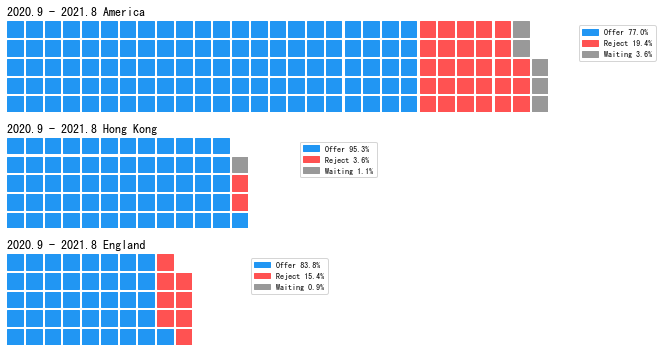

In [15]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': data['America'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['America']))*100)) for k, v in data['America'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 America',
                'loc': 'left'
            }
        },
        '312': {
            'values': data['Hong Kong'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['Hong Kong']))*100)) for k, v in data['Hong Kong'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.2, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 Hong Kong',
                'loc': 'left'
            }
        },
        '313': {
            'values': data['England'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['England']))*100)) for k, v in data['England'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.3, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 England',
                'loc': 'left'
            }
        },
    },
    rows=5,
    colors=("#2196f3", "#ff5252", "#999999"),  # shared parameter among subplots
    figsize=(9, 5)  # figsize is a parameter of plt.figure
)